# Segmentation des clients d'un Mall 

### Les importations nécessaires au traitement du problème

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sea
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### Ouvrir le data frame

In [13]:
# reading the dataframe
df=pd.read_csv("/Users/jeffreyverdiere/Documents/ENSAE MS Data Science/Projet Perso/Mall_Customers.csv")

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Standardisation des variables

In [15]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
features = df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


## Transformation des dummies variables en variable binaire comme le genre

In [16]:
gender = df['Genre']
newdf = scaled_features.join(gender)

newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

newdf = newdf.drop(['Genre_Male'],axis=1)

newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Genre_Female
0,-1.738999,-1.424569,-0.434801,0
1,-1.738999,-1.281035,1.195704,0
2,-1.700830,-1.352802,-1.715913,1
3,-1.700830,-1.137502,1.040418,1
4,-1.662660,-0.563369,-0.395980,1


# Construction d'un modèle de clustering

/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0

Text(0, 0.5, 'Inertia')

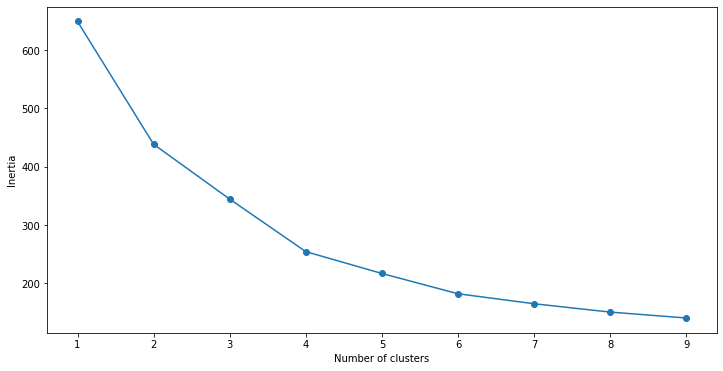

In [17]:
SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

On peut remarquer que le nombre de clusters optimals est de 4.

## Les métriques importantes: le coefficient de silhouette

Un coefficient de silhouette, ou un score de silhouette, est une métrique utilisée pour évaluer la qualité des clusters créés par l'algorithme.

Les scores de silhouette vont de -1 à +1. Plus le score de silhouette est élevé, meilleur est le modèle

Le score de silhouette mesure la distance entre tous les points de données au sein du même cluster. Plus cette distance est faible, meilleur est le score de silhouette.

Il mesure également la distance entre un objet et les points de données dans le cluster le plus proche. Plus cette distance est élevée, mieux c'est.

Un score de silhouette plus proche de +1 indique de bonnes performances de clustering, et un score de silhouette plus proche de -1 indique un modèle de clustering médiocre.

Calculons le score de silhouette du modèle que nous venons de construire :

In [18]:
# First, build a model with 4 clusters

kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print(silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

0.35027020434653977


/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Ce n'est pas un mauvais modèle, mais nous pouvons faire mieux et essayer d'obtenir une séparation de cluster plus élevée.

Avant d'essayer de faire cela, visualisons les clusters que nous venons de créer pour avoir une idée de l'efficacité du modèle :

/Users/jeffreyverdiere/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


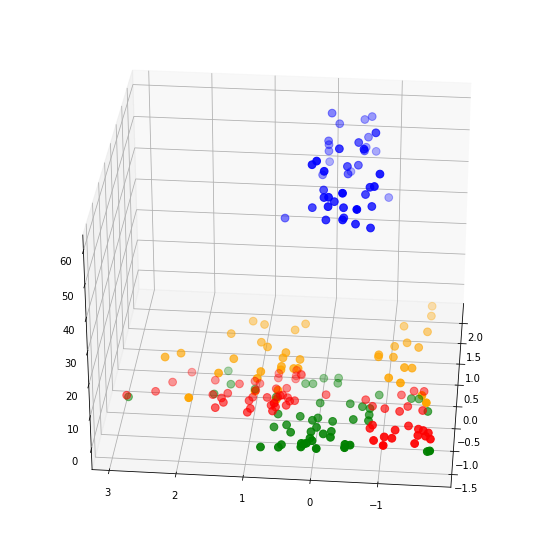

In [19]:
clusters = kmeans.fit_predict(newdf.iloc[:,1:])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], df["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)

ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)
ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

À partir du diagramme ci-dessus, nous pouvons voir que la séparation des clusters n'est pas trop importante.

Les points rouges sont mélangés avec le bleu et le vert chevauche le jaune.

Ceci, ainsi que le score de silhouette, nous montre que le modèle ne fonctionne pas trop bien.

Maintenant, créons un nouveau modèle qui a une meilleure séparabilité de cluster que celui-ci.



## Construction d'un second modèle de clustering

Pour ce modèle, faisons une sélection de fonctionnalités.

Nous pouvons utiliser une technique appelée Analyse en Composantes Principales (ACP).

L'ACP est une technique qui nous aide à réduire la dimension d'un ensemble de données. Lorsque nous exécutons PCA sur une trame de données, de nouveaux composants sont créés. Ces composantes expliquent la variance maximale dans le modèle.

Nous pouvons sélectionner un sous-ensemble de ces variables et les inclure dans le modèle K-means.

Exécutons maintenant PCA sur l'ensemble de données :

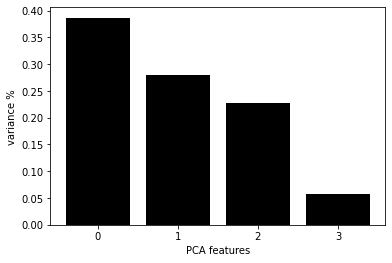

In [20]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

Ce graphique nous montre chaque composante de l'ACP, ainsi que sa variance.

Sur la base de cette visualisation, nous pouvons voir que les deux premiers composants de l'ACP expliquent environ 70 % de la variance de l'ensemble de données.

Nous pouvons intégrer ces deux composants dans le modèle.

Reconstituons le modèle avec les deux premiers composants principaux et décidons du nombre de clusters à utiliser :

In [21]:
print(PCA_components.head())

          0         1         2         3
0  0.466061 -0.927798 -2.043546  0.435543
1 -1.360896 -0.923979 -1.842483  0.677215
2  1.325765 -0.516098 -2.087736 -0.820296
3 -1.272480 -0.780274 -1.821059 -0.280627
4  0.482271 -0.231154 -1.824226 -0.378004


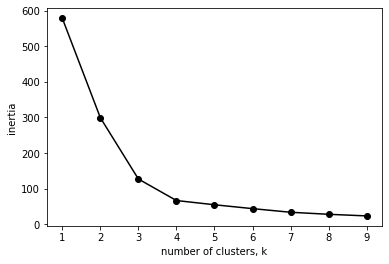

In [22]:
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(PCA_components.iloc[:,:2])
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Encore une fois, il semble que le nombre optimal de clusters soit de 4.

On peut calculer le score de silhouette pour ce modèle avec 4 clusters :

In [23]:
model = KMeans(n_clusters=4)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print(silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

0.6131934145169958


Nous pouvons visualiser les clusters pour ce modèle comme nous l'avons fait précédemment :

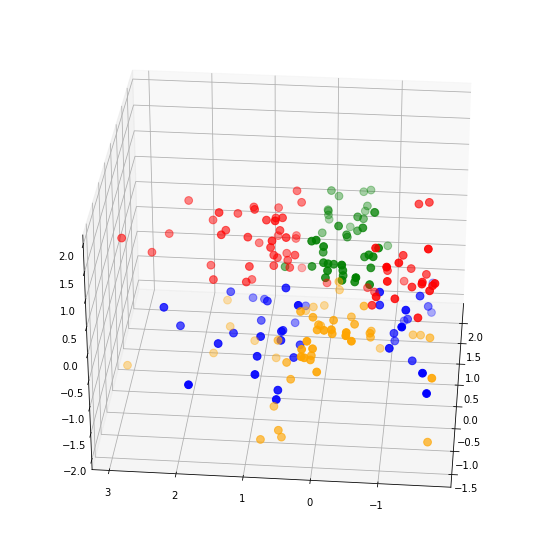

In [24]:
model = KMeans(n_clusters=4)

clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters
 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf.label == 0], newdf["Annual Income (k$)"][newdf.label == 0], newdf["Spending Score (1-100)"][newdf.label == 0], c='blue', s=60)
ax.scatter(newdf.Age[newdf.label == 1], newdf["Annual Income (k$)"][newdf.label == 1], newdf["Spending Score (1-100)"][newdf.label == 1], c='red', s=60)
ax.scatter(newdf.Age[newdf.label == 2], newdf["Annual Income (k$)"][newdf.label == 2], newdf["Spending Score (1-100)"][newdf.label == 2], c='green', s=60)

ax.scatter(newdf.Age[newdf.label == 3], newdf["Annual Income (k$)"][newdf.label == 3], newdf["Spending Score (1-100)"][newdf.label == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

Notez que les clusters du deuxième modèle sont bien mieux séparés que ceux du premier modèle.

De plus, le score de silhouette du deuxième modèle est beaucoup plus élevé.

Pour ces raisons, nous pouvons choisir le deuxième modèle pour poursuivre notre analyse.

# L'analyse par grappes

Maintenant que nous avons fini de construire ces différents clusters, essayons de les interpréter et regardons les différents segments de clientèle.

Tout d'abord, mappons les clusters à l'ensemble de données et examinons la tête du bloc de données.

In [25]:
df = pd.read_csv('/Users/jeffreyverdiere/Documents/ENSAE MS Data Science/Projet Perso/Mall_Customers.csv')
df = df.drop(['CustomerID'],axis=1)

# map back clusters to dataframe

pred = model.predict(PCA_components.iloc[:,:2])
frame = pd.DataFrame(df)
frame['cluster'] = pred
frame.tail()

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
195,Female,35,120,79,1
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,3
199,Male,30,137,83,1


In [28]:
avg_df = df.groupby(['cluster'], as_index=False).mean()


<AxesSubplot:xlabel='cluster', ylabel='Annual Income (k$)'>

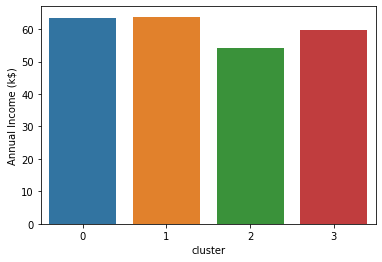

In [27]:
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Age'>

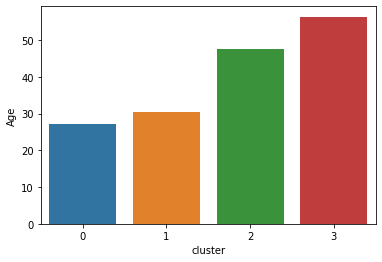

In [37]:
sns.barplot(x='cluster',y='Age',data=avg_df)

<AxesSubplot:xlabel='cluster', ylabel='Spending Score (1-100)'>

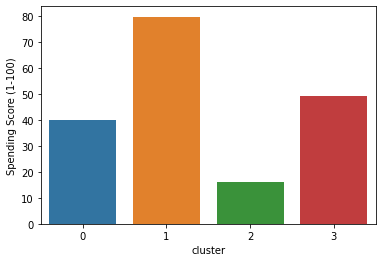

In [38]:
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df)

In [40]:
df2 = pd.DataFrame(df.groupby(['cluster','Genre'])['Genre'].count())
df2.head()


Genre
cluster Genre        
0       Female     31
        Male       19
1       Female     37
        Male       28
2       Female     18